# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Verify that environment variables were loaded
print(f"Alpaca key data type: {type(alpaca_api_key)}")
print(f"Alpaca secret data type: {type(alpaca_secret_key)}")

Alpaca key data type: <class 'str'>
Alpaca secret data type: <class 'str'>


In [4]:
# Create the Alpaca API object, specifying use of the paper trading account:
alpaca = tradeapi.REST(
     alpaca_api_key,
    alpaca_secret_key,
    "http://paper-api.alpaca.markets",
    api_version = "v2"
)

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [5]:
# Set current amount of crypto asset
my_btc = 1.2
my_eth = 5.3

In [6]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [7]:
#BTC response
response_data_btc = requests.get(btc_url)
response_data_btc
response_content_btc = response_data_btc.content
response_content_btc
print(response_content_btc)

b'{\n\t"data": {\n\t\t"1": {\n\t\t\t"id": 1,\n\t\t\t"name": "Bitcoin",\n\t\t\t"symbol": "BTC",\n\t\t\t"website_slug": "bitcoin",\n\t\t\t"rank": 1,\n\t\t\t"circulating_supply": 18720512,\n\t\t\t"total_supply": 18720512,\n\t\t\t"max_supply": 21000000,\n\t\t\t"quotes": {\n\t\t\t\t"USD": {\n\t\t\t\t\t"price": 36138.0000000000000000,\n\t\t\t\t\t"volume_24h": 45237067704,\n\t\t\t\t\t"market_cap": 677699337429,\n\t\t\t\t\t"percentage_change_1h": -1.8229949577784100,\n\t\t\t\t\t"percentage_change_24h": -7.8946939336920000,\n\t\t\t\t\t"percentage_change_7d": -10.6319102084965000,\n\t\t\t\t\t"percent_change_1h": -1.8229949577784100,\n\t\t\t\t\t"percent_change_24h": -7.8946939336920000,\n\t\t\t\t\t"percent_change_7d": -10.6319102084965000\n\t\t\t\t},\n\t\t\t\t"CAD": {\n\t\t\t\t\t"price": 43680.0006,\n\t\t\t\t\t"volume_24h": 54678043733.8248,\n\t\t\t\t\t"market_cap": 819135189150.432,\n\t\t\t\t\t"percent_change_1h": -1.8229949577784100,\n\t\t\t\t\t"percent_change_24h": -7.8946939336920000,\n\t\t\t

In [8]:
#BTC json function, library and format
import json
btc_data = response_data_btc.json()
print(json.dumps(btc_data, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18720512,
            "total_supply": 18720512,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 36138.0,
                    "volume_24h": 45237067704,
                    "market_cap": 677699337429,
                    "percentage_change_1h": -1.82299495777841,
                    "percentage_change_24h": -7.894693933692,
                    "percentage_change_7d": -10.6319102084965,
                    "percent_change_1h": -1.82299495777841,
                    "percent_change_24h": -7.894693933692,
                    "percent_change_7d": -10.6319102084965
                },
                "CAD": {
                    "price": 43680.0006,
                    "volume_24h": 54678043733.8248,
                    "ma

In [9]:
#ETH response
response_data_eth = requests.get(eth_url)
response_data_eth
response_content_eth = response_data_eth.content
response_content_eth
print(response_content_eth)

b'{\n\t"data": {\n\t\t"1027": {\n\t\t\t"id": 1027,\n\t\t\t"name": "Ethereum",\n\t\t\t"symbol": "ETH",\n\t\t\t"website_slug": "ethereum",\n\t\t\t"rank": 2,\n\t\t\t"circulating_supply": 116060902,\n\t\t\t"total_supply": 116060902,\n\t\t\t"max_supply": 0,\n\t\t\t"quotes": {\n\t\t\t\t"USD": {\n\t\t\t\t\t"price": 2513.1300000000000000,\n\t\t\t\t\t"volume_24h": 46039212793,\n\t\t\t\t\t"market_cap": 291737413829,\n\t\t\t\t\t"percentage_change_1h": -2.2348886203528600,\n\t\t\t\t\t"percentage_change_24h": -9.5356198889353800,\n\t\t\t\t\t"percentage_change_7d": -9.5437506632126800,\n\t\t\t\t\t"percent_change_1h": -2.2348886203528600,\n\t\t\t\t\t"percent_change_24h": -9.5356198889353800,\n\t\t\t\t\t"percent_change_7d": -9.5437506632126800\n\t\t\t\t},\n\t\t\t\t"CAD": {\n\t\t\t\t\t"price": 3037.620231,\n\t\t\t\t\t"volume_24h": 55647596502.8991,\n\t\t\t\t\t"market_cap": 352623012095.112,\n\t\t\t\t\t"percent_change_1h": -2.2348886203528600,\n\t\t\t\t\t"percent_change_24h": -9.5356198889353800,\n\t\t\

In [10]:
#BTC json function, library and format
import json
eth_data = response_data_eth.json()
print(json.dumps(eth_data, indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 116060902,
            "total_supply": 116060902,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 2513.13,
                    "volume_24h": 46039212793,
                    "market_cap": 291737413829,
                    "percentage_change_1h": -2.23488862035286,
                    "percentage_change_24h": -9.53561988893538,
                    "percentage_change_7d": -9.54375066321268,
                    "percent_change_1h": -2.23488862035286,
                    "percent_change_24h": -9.53561988893538,
                    "percent_change_7d": -9.54375066321268
                },
                "CAD": {
                    "price": 3037.620231,
                    "volume_24h": 55647596502.8991,
               

In [11]:
# Fetch current BTC price
btc_price = btc_data["data"]["1"]["quotes"]["USD"]["price"]

# Fetch current ETH price
eth_price = eth_data["data"]["1027"]["quotes"]["USD"]["price"]

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $43365.60
The current value of your 5.3 ETH is $13319.59


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [12]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [13]:
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [14]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
     alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [15]:
# Format current date as ISO format
current_date = pd.Timestamp("2021-5-10", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(tickers, timeframe, start=current_date, end=current_date).df
df_portfolio.index = df_portfolio.index.date
# Preview DataFrame
df_portfolio.head()

AGG                                    SPY                  \
              open    high    low   close   volume   open    high     low   
2021-05-10  114.61  114.72  114.4  114.43  4737416  422.5  422.74  417.81   

                              
             close    volume  
2021-05-10  417.98  72076213

In [16]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.43
Current SPY closing price: $417.98


In [17]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20899.00
The current value of your 200 AGG shares is $22886.00


### Savings Health Analysis

In [18]:
# Set monthly household income
monthly_income = 120000
total_value_crypto = my_btc_value + my_eth_value
total_value_shares = my_agg_value + my_spy_value
value_data = {'Total Value':[total_value_crypto, total_value_shares]}
# Create savings DataFrame
df_savings = pd.DataFrame(value_data, index=['Crypto', 'Shares'])
# Display savings DataFrame
display(df_savings)

,Total Value
Crypto,56685.189
Shares,43785.000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D851D009D0>],
      dtype=object)

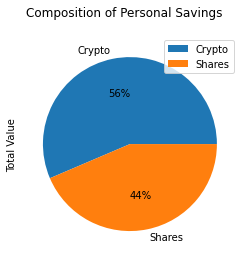

In [19]:
# Plot savings pie chart
df_savings.plot.pie(subplots=True, autopct='%.0f%%', title="Composition of Personal Savings")

In [20]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_value_crypto + total_value_shares

# Validate saving health
if total_savings > emergency_fund:
    print("Congrats, you have exceeded your financial goal!")
elif emergency_fund == total_savings:
    print("Congrats, you have reached your financial goal.")
else:
    print(f"Currently, you are {emergency_fund - total_savings} away from your savings goal.")

Currently, you are 259529.811 away from your savings goal.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [21]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
     alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [22]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp("2020-05-01", tz='America/New_York').isoformat()

In [26]:
ticker = ["AGG", "SPY"]

df_stocks = alpaca.get_barset(ticker, timeframe, start=start_date, end=end_date).df

df_stocks

AGG                                        \
                             open      high       low   close    volume   
2019-12-09 00:00:00-05:00  112.69  112.7200  112.5650  112.58   4416131   
2019-12-10 00:00:00-05:00  112.67  112.6700  112.4900  112.54   2689383   
2019-12-11 00:00:00-05:00  112.67  112.9000  112.6100  112.84   2184383   
2019-12-12 00:00:00-05:00  112.79  112.7900  112.2200  112.36   4359234   
2019-12-13 00:00:00-05:00  112.58  112.8600  112.4000  112.80   3251499   
...                           ...       ...       ...     ...       ...   
2020-04-27 00:00:00-04:00  117.21  117.3600  116.8200  116.84   6707494   
2020-04-28 00:00:00-04:00  117.27  117.4500  117.1200  117.25  10729690   
2020-04-29 00:00:00-04:00  117.29  117.4800  117.2000  117.43   9036494   
2020-04-30 00:00:00-04:00  117.38  117.4900  117.0650  117.15  13756340   
2020-05-01 00:00:00-04:00  116.97  117.0998  116.6775  116.90  11778582   

                              SPY                                        
                             open      high      low   close     volume  
2019-12-09 00:00:00-05:00  314.44  315.1800  313.800  313.87   29338231  
2019-12-10 00:00:00-05:00  313.82  314.5500  312.810  313.55   40763264  
2019-12-11 00:00:00-05:00  314.03  314.7000  313.595  314.41   41107413  
2019-12-12 00:00:00-05:00  314.43  317.9900  314.170  317.14   82589898  
2019-12-13 00:00:00-05:00  316.87  318.6700  316.020  317.28   68681546  
...                           ...       ...      ...     ...        ...  
2020-04-27 00:00:00-04:00  285.12  288.2700  284.620  287.11   67454166  
2020-04-28 00:00:00-04:00  291.02  291.4000  285.400  285.77   95561389  
2020-04-29 00:00:00-04:00  291.53  294.8800  290.410  293.19  102013837  
2020-04-30 00:00:00-04:00  291.71  293.3239  288.590  290.39  101677550  
2020-05-01 00:00:00-04:00  285.31  290.6572  281.520  282.73  111321036  

[100 rows x 10 columns]

In [29]:
# Get 5 years' worth of historical data for SPY and AGG
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_stocks,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

# Display sample data
df_stocks.head()

AGG                                       SPY  \
                             open    high      low   close   volume    open   
2019-12-09 00:00:00-05:00  112.69  112.72  112.565  112.58  4416131  314.44   
2019-12-10 00:00:00-05:00  112.67  112.67  112.490  112.54  2689383  313.82   
2019-12-11 00:00:00-05:00  112.67  112.90  112.610  112.84  2184383  314.03   
2019-12-12 00:00:00-05:00  112.79  112.79  112.220  112.36  4359234  314.43   
2019-12-13 00:00:00-05:00  112.58  112.86  112.400  112.80  3251499  316.87   

                                                              
                             high      low   close    volume  
2019-12-09 00:00:00-05:00  315.18  313.800  313.87  29338231  
2019-12-10 00:00:00-05:00  314.55  312.810  313.55  40763264  
2019-12-11 00:00:00-05:00  314.70  313.595  314.41  41107413  
2019-12-12 00:00:00-05:00  317.99  314.170  317.14  82589898  
2019-12-13 00:00:00-05:00  318.67  316.020  317.28  68681546

In [32]:
# Printing the simulation input data

MC_fiveyear.portfolio_data.head()

AGG                                    \
                             open    high      low   close   volume   
2019-12-09 00:00:00-05:00  112.69  112.72  112.565  112.58  4416131   
2019-12-10 00:00:00-05:00  112.67  112.67  112.490  112.54  2689383   
2019-12-11 00:00:00-05:00  112.67  112.90  112.610  112.84  2184383   
2019-12-12 00:00:00-05:00  112.79  112.79  112.220  112.36  4359234   
2019-12-13 00:00:00-05:00  112.58  112.86  112.400  112.80  3251499   

                                           SPY                           \
                          daily_return    open    high      low   close   
2019-12-09 00:00:00-05:00          NaN  314.44  315.18  313.800  313.87   
2019-12-10 00:00:00-05:00    -0.000355  313.82  314.55  312.810  313.55   
2019-12-11 00:00:00-05:00     0.002666  314.03  314.70  313.595  314.41   
2019-12-12 00:00:00-05:00    -0.004254  314.43  317.99  314.170  317.14   
2019-12-13 00:00:00-05:00     0.003916  316.87  318.67  316.020  317.28   

                                                  
                             volume daily_return  
2019-12-09 00:00:00-05:00  29338231          NaN  
2019-12-10 00:00:00-05:00  40763264    -0.001020  
2019-12-11 00:00:00-05:00  41107413     0.002743  
2019-12-12 00:00:00-05:00  82589898     0.008683  
2019-12-13 00:00:00-05:00  68681546     0.000441

In [33]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.983643,0.979769,1.025393,0.991116,1.005858,1.017111,0.992571,0.977826,1.019648,0.987175,...,1.003105,0.976320,1.014383,0.981823,0.991836,1.048164,1.019105,0.974505,0.996599,0.995054
2,0.983786,0.962220,1.005088,0.959092,1.022811,1.004286,0.985793,1.000511,1.008546,1.011298,...,1.016139,0.984542,1.042170,0.946372,1.010073,1.047863,1.050272,0.974696,0.985408,1.006551
3,0.997643,0.926639,0.972809,0.976740,0.979199,0.994133,0.969863,1.044997,1.015849,1.011605,...,0.997320,1.004178,1.001225,0.937814,1.010417,1.058950,1.072911,0.970037,0.975467,0.995680
4,0.968348,0.917697,0.943577,0.991409,0.989184,0.991445,0.968500,1.052312,1.031863,1.038816,...,1.020860,1.020842,1.007502,0.960283,0.998779,1.075176,1.066414,0.989903,1.014553,0.993499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,1.587627,0.030209,0.038054,0.028421,0.066474,0.048272,0.224940,0.024635,0.037577,0.113981,...,0.347945,0.228890,0.007807,0.004786,0.234479,0.264997,0.030195,0.065447,0.459685,0.013052
7557,1.599898,0.030743,0.037393,0.027856,0.066678,0.045860,0.227558,0.024681,0.037012,0.115221,...,0.342929,0.230339,0.007982,0.004833,0.230215,0.266295,0.029803,0.064372,0.457083,0.012907
7558,1.631590,0.030196,0.037588,0.027048,0.067279,0.046771,0.225721,0.024279,0.037765,0.115511,...,0.331385,0.232334,0.008077,0.004711,0.233281,0.261086,0.029661,0.064744,0.458408,0.013059
7559,1.621395,0.030235,0.036994,0.027018,0.068628,0.046543,0.225436,0.024218,0.037522,0.113120,...,0.332919,0.229528,0.008174,0.004759,0.224957,0.259982,0.029850,0.065606,0.458524,0.013077


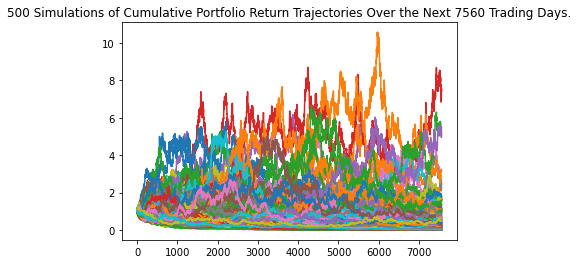

In [35]:

# Plot simulation outcomes
line = MC_fiveyear.plot_simulation()

# Save the plot
line.get_figure().savefig("MC_fiveyear_lineplot.png", bbox_inches="tight")

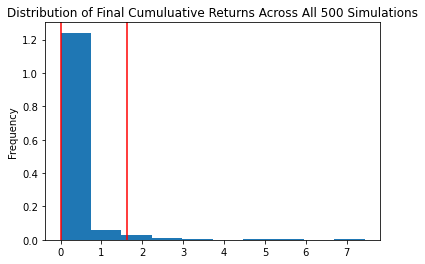

In [36]:
# Plot probability distribution and confidence intervals
dist = MC_fiveyear.plot_distribution()

# Save the plot
dist.get_figure().savefig('MC_fiveyear_distplot.png',bbox_inches='tight')

In [37]:
tbl = MC_fiveyear.summarize_cumulative_return()
print(tbl)

count           500.000000
mean              0.242658
std               0.591637
min               0.000333
25%               0.023243
50%               0.064606
75%               0.206737
max               7.444168
95% CI Lower      0.002471
95% CI Upper      1.617954
Name: 7560, dtype: float64


In [38]:
initial_investment = 20000

ci_lower = round(tbl[8]*10000,2)
ci_upper = round(tbl[9]*10000,2)

print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $24.71 and $16179.54


In [39]:
initial_investment_plus = 20000 * 1.5

ci_lower = round(tbl[8]*10000,2)
ci_upper = round(tbl[9]*10000,2)

print(f"There is a 95% chance that an initial investment of ${initial_investment_plus} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $24.71 and $16179.54


In [30]:
?MCSimulation

Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number 

In [45]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_stocks,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [46]:
MC_fiveyear.portfolio_data.head()

AGG                                       \
                              open      high      low    close   volume   
2019-08-09 00:00:00-04:00  112.825  112.9500  112.575  112.630  2054395   
2019-08-12 00:00:00-04:00  112.930  113.1850  112.870  113.065  1581109   
2019-08-13 00:00:00-04:00  113.150  113.1504  112.785  112.890  2452786   
2019-08-14 00:00:00-04:00  113.280  113.3800  113.210  113.260  2543412   
2019-08-15 00:00:00-04:00  113.390  113.9100  113.370  113.760  2654437   

                                           SPY                            \
                          daily_return    open      high     low   close   
2019-08-09 00:00:00-04:00          NaN  292.58  293.2400  289.65  291.59   
2019-08-12 00:00:00-04:00     0.003862  289.96  291.6052  287.02  288.10   
2019-08-13 00:00:00-04:00    -0.001548  287.74  294.1500  287.36  292.43   
2019-08-14 00:00:00-04:00     0.003278  288.07  292.4644  283.76  283.92   
2019-08-15 00:00:00-04:00     0.004415  284.88  285.6400  282.39  284.69   

                                                   
                              volume daily_return  
2019-08-09 00:00:00-04:00   79060953          NaN  
2019-08-12 00:00:00-04:00   55499992    -0.011969  
2019-08-13 00:00:00-04:00   82355835     0.015030  
2019-08-14 00:00:00-04:00  114406673    -0.029101  
2019-08-15 00:00:00-04:00   82311442     0.002712

In [47]:
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994270,1.003934,0.998734,1.007807,1.003616,1.002858,1.006288,1.000050,1.001178,0.998009,...,0.999606,1.001254,0.991061,0.998011,1.002271,1.000004,1.004289,0.997340,0.998826,0.999288
2,0.996225,1.003650,1.000432,1.007208,1.010302,0.999482,1.007037,0.998828,0.997755,0.998808,...,1.007694,1.001508,0.989176,0.998560,0.997297,0.995031,1.000923,1.001332,0.998018,0.998864
3,0.996079,1.003198,0.999255,1.005475,1.011395,1.001180,1.010180,0.998840,0.994151,1.004308,...,1.010379,1.001372,0.985153,0.995305,0.994392,0.995354,1.002424,1.004770,1.000603,0.995090
4,0.996983,1.005431,1.004747,1.006742,1.015531,1.000383,1.007372,0.996943,0.995541,0.997535,...,1.011269,0.999037,0.989090,1.000591,0.992393,0.992179,1.000783,1.002670,1.002977,1.001783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.520410,1.674522,1.613200,1.529420,1.565268,1.767134,1.461708,1.764485,1.967488,1.617133,...,2.033025,2.022647,1.648743,1.495480,1.646454,2.115140,1.903994,1.717185,1.888568,1.659360
1257,1.523184,1.678512,1.613257,1.529347,1.560108,1.761565,1.463822,1.769487,1.973465,1.617033,...,2.031268,2.027833,1.648930,1.496463,1.647460,2.114954,1.903005,1.726770,1.877167,1.662957
1258,1.519905,1.675113,1.613405,1.537391,1.559361,1.760226,1.465178,1.774070,1.971596,1.622146,...,2.024761,2.029993,1.654781,1.493553,1.640800,2.112538,1.910834,1.724408,1.880567,1.661391
1259,1.521332,1.673676,1.607719,1.529742,1.562105,1.764716,1.466661,1.781990,1.972231,1.623117,...,2.027572,2.032202,1.667801,1.500140,1.649235,2.116143,1.901507,1.730076,1.887481,1.663309


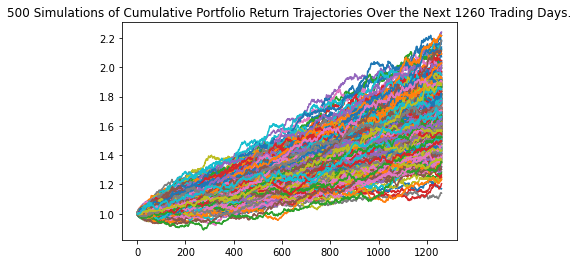

In [50]:
line_plot = MC_fiveyear.plot_simulation()

line_plot.get_figure().savefig("MC_fiveyear_sim_plot.png", bbox_inches="tight")

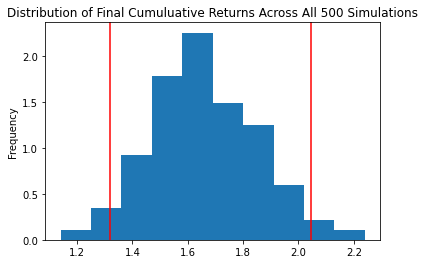

In [51]:
dist_plot = MC_fiveyear.plot_distribution()

dist_plot.get_figure().savefig('MC_fiveyear_dist_plot.png',bbox_inches='tight')

In [52]:
tbl = MC_fiveyear.summarize_cumulative_return()
print(tbl)

count           500.000000
mean              1.661603
std               0.191768
min               1.140265
25%               1.528903
50%               1.648254
75%               1.789050
max               2.239941
95% CI Lower      1.319569
95% CI Upper      2.045486
Name: 1260, dtype: float64


In [53]:
initial_investment = 20000

ci_lower = round(tbl[8]*10000,2)
ci_upper = round(tbl[9]*10000,2)

print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 5 years will end within in the range of $13195.69 and $20454.86


In [54]:
initial_investment = 20000 * 1.5


In [17]:
# Printing the simulation input data
# YOUR CODE HERE!

AGG                                        \
                             open      high      low   close     volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.018353,0.990991,0.993542,1.004285,1.010543,0.996096,1.004661,1.009838,1.000822,0.996604,...,0.989897,1.000037,1.012813,1.001722,1.000656,1.002117,1.003528,1.002606,0.991949,0.997364
2,1.014560,0.992820,0.996145,1.002978,1.005147,1.004685,1.001202,1.010342,0.993041,0.992330,...,0.988645,1.007607,1.020869,1.005857,1.006082,0.996915,1.004331,0.990710,0.987952,0.991272
3,1.019269,1.001492,1.009462,1.014306,1.001689,1.025238,0.996099,1.011401,0.994015,0.994844,...,0.986177,1.005196,1.031488,1.005400,1.002427,0.999050,1.002731,0.979590,0.999434,0.989640
4,1.014859,1.003336,1.004606,1.019190,1.003226,1.018442,0.993964,1.005165,1.001041,1.002201,...,0.992091,1.001366,1.029699,1.021144,0.997660,1.006650,0.990625,0.980227,1.004842,0.984748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,13.864071,6.077511,11.731330,31.243365,30.053930,14.757036,2.210814,15.528460,7.255163,16.637307,...,5.822107,2.259562,3.783502,5.828729,4.720930,35.072331,14.912683,5.653658,5.648629,6.315486
7557,13.746201,6.059207,11.585533,31.287242,30.582049,14.673008,2.186417,15.436076,7.339485,16.766272,...,5.823840,2.253127,3.775175,5.815855,4.766911,35.030715,15.116486,5.676312,5.688687,6.379419
7558,13.599568,6.013279,11.615333,31.745904,30.424040,14.651556,2.171581,15.329036,7.283202,16.707132,...,5.856829,2.229323,3.777023,5.802119,4.840632,35.167994,15.167563,5.681892,5.727080,6.358350
7559,13.777501,5.987253,11.684295,31.652897,30.570575,14.567353,2.180296,15.222299,7.293879,16.740933,...,5.890849,2.237878,3.812925,5.792500,4.856454,34.870746,15.323380,5.679676,5.710282,6.373808


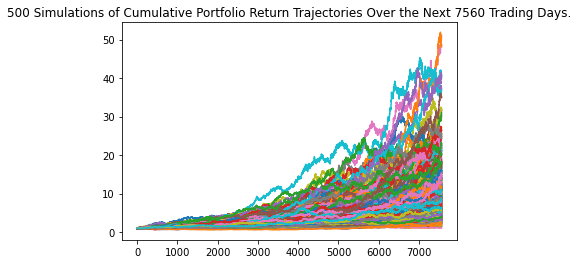

In [19]:
# Plot simulation outcomes
# YOUR CODE HERE!

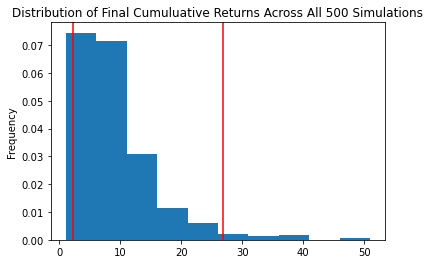

In [20]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              9.200762
std               6.659594
min               1.045214
25%               4.941116
50%               7.381182
75%              11.327780
max              50.993592
95% CI Lower      2.296975
95% CI Upper     26.810558
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $45939.5 and $536211.17


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $68909.24 and $804316.75


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002773,0.995921,0.995673,0.994602,1.005021,0.998532,1.001126,1.005124,0.994500,0.999171,...,1.002697,1.007377,0.999067,0.997822,0.998338,1.003092,0.997770,1.005395,0.999348,1.005300
2,1.004519,0.994920,0.995504,0.997885,0.999418,1.002665,0.998714,1.009062,0.992389,0.997706,...,1.004034,1.008911,0.999323,1.000654,0.999466,1.004265,0.994733,1.003748,0.996511,1.012382
3,1.003420,0.989709,0.994363,1.001670,1.004349,1.002377,1.001845,1.011481,0.991912,0.994580,...,1.002351,1.006664,1.002174,0.998934,1.003854,1.010202,0.996131,1.002018,0.999665,1.014892
4,0.999165,0.990064,0.986792,1.003455,1.007765,1.007514,0.997581,1.015886,0.986637,0.998216,...,1.002834,0.999865,1.000353,1.003079,1.003303,1.012221,0.997754,1.000544,1.001517,1.013704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.266580,1.196174,1.233861,1.609848,1.173492,1.242440,1.329611,1.157732,1.354542,0.980124,...,1.193369,1.265576,1.176646,1.146853,1.214548,1.145207,1.193672,1.131104,1.003777,1.234636
1257,1.259830,1.201814,1.231141,1.621046,1.172662,1.239173,1.331916,1.157722,1.354061,0.980815,...,1.194320,1.269009,1.182694,1.146907,1.213701,1.143455,1.200143,1.131160,1.006530,1.234546
1258,1.265916,1.196261,1.226184,1.622075,1.174943,1.240829,1.335755,1.157986,1.350916,0.981539,...,1.203336,1.271746,1.178878,1.148263,1.213656,1.146064,1.197322,1.134041,1.005902,1.236184
1259,1.268268,1.202293,1.223321,1.623647,1.170809,1.248084,1.336792,1.162289,1.341674,0.977214,...,1.200892,1.273981,1.175435,1.145972,1.210717,1.146312,1.194024,1.132655,1.007751,1.242664


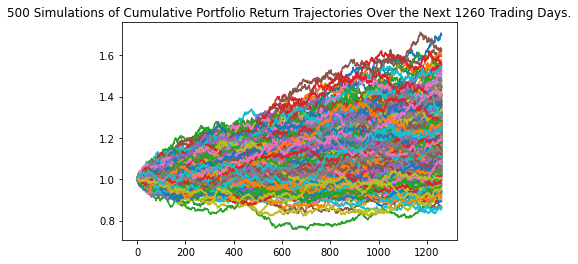

In [26]:
# Plot simulation outcomes
# YOUR CODE HERE!

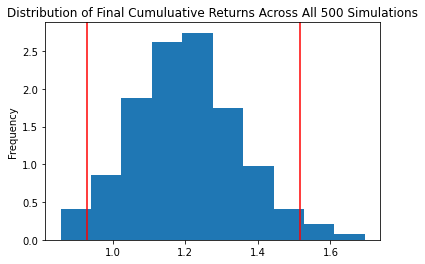

In [27]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.202273
std               0.145565
min               0.856322
25%               1.100622
50%               1.197687
75%               1.292270
max               1.695081
95% CI Lower      0.928556
95% CI Upper      1.517173
Name: 1260, dtype: float64


In [29]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 30 years will end within in the range of $55713.36 and $91030.38


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997817,0.998428,1.000816,1.000202,1.002120,0.998788,1.004226,1.004250,1.001431,1.000740,...,0.995519,1.001253,1.000492,0.994026,1.006129,1.002356,1.005233,0.999769,1.002106,1.003746
2,0.994703,0.996223,1.001987,0.998816,1.002372,0.996708,1.009074,1.006986,1.006219,0.995591,...,0.991815,1.001091,1.003774,0.989341,1.007530,1.009809,1.007273,0.999666,1.006340,0.998303
3,0.994115,0.993375,0.992622,1.001069,0.999700,1.000123,1.011610,1.009254,1.012194,0.998619,...,0.992699,1.003085,1.005997,0.991536,1.004239,1.010765,1.009501,0.999652,1.011737,0.998762
4,0.999040,0.997821,0.992272,0.999767,1.000459,1.006178,1.008906,1.009897,1.014282,0.995619,...,0.997683,1.007825,1.007858,0.991188,1.009171,1.009303,1.008223,1.003270,1.014350,1.001691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.164254,1.246948,1.441080,1.685210,1.702114,1.474774,1.535126,1.288182,1.138653,1.500977,...,1.367442,1.357662,1.661583,1.348599,1.649220,1.782632,1.450872,1.701338,1.199957,1.171159
2517,2.169555,1.246315,1.436260,1.685058,1.697652,1.479128,1.536203,1.288485,1.144082,1.498097,...,1.366833,1.360457,1.672969,1.351751,1.646287,1.781356,1.459438,1.695322,1.197466,1.171882
2518,2.169089,1.243387,1.426446,1.685480,1.714264,1.479079,1.537777,1.289258,1.140795,1.496271,...,1.368088,1.357853,1.662915,1.354957,1.637911,1.781046,1.451367,1.695901,1.201111,1.172847
2519,2.170695,1.238881,1.419187,1.670521,1.720418,1.478161,1.544292,1.296500,1.137510,1.499085,...,1.370125,1.359697,1.664317,1.352170,1.633762,1.778638,1.443413,1.699061,1.191529,1.166331


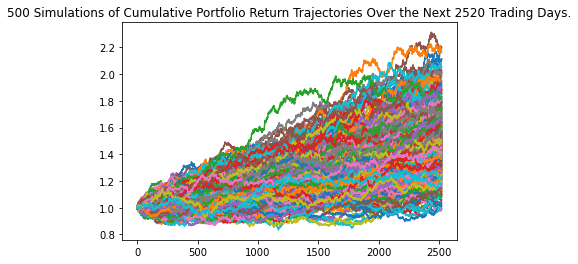

In [32]:
# Plot simulation outcomes
# YOUR CODE HERE!

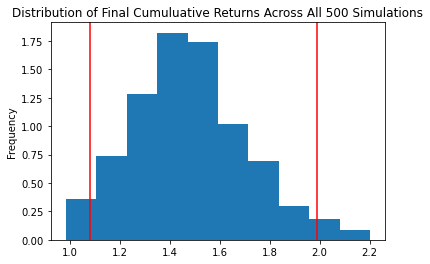

In [33]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.477364
std               0.230147
min               0.984413
25%               1.319127
50%               1.468676
75%               1.613270
max               2.202006
95% CI Lower      1.083048
95% CI Upper      1.990417
Name: 2520, dtype: float64


In [35]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 30 years will end within in the range of $64982.9 and $119425.0
